<a href="https://colab.research.google.com/github/BlackCurrantDS/ATiML-Project/blob/master/Final_Model_train_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
train_data = pd.read_csv("features_scaled_train.csv", index_col=0)

In [3]:
train_data.head(1)

,ID,book_lenght,book_sen,book_word,lenght_book,number_sen,number_word,number_of_stop_words,number_of_foreignwords,count_dial_break,noun,verb,adj,ProperNoun,num,Puch,she,he,she_he_ratio,period,comma,colon,semi_colon,exl,q,positive_x,negative_x,neutral,compund,positive_y,negative_y,anger,disgust,fear,sadness,anticipation,joy,surprise,trust,genre
0,214.0,0.277991,0.299471,0.278088,0.277991,0.299471,0.278088,0.535962,0.038124,0.009887,0.527253,0.48169,0.653485,0.0,0.37607,0.598408,0.250728,0.30137,0.107704,0.390218,0.641153,0.699711,0.459219,0.278968,0.453705,0.011573,0.0,0.009859,0.073315,0.349139,1.0,1.0,0.944704,1.0,0.759819,0.580613,0.663251,0.653755,0.47033,Allegories


In [0]:
val_data = pd.read_csv("features_scaled_test.csv", index_col=0)

In [5]:
val_data.head(1)

,ID,book_lenght,book_sen,book_word,lenght_book,number_sen,number_word,number_of_stop_words,number_of_foreignwords,count_dial_break,noun,verb,adj,ProperNoun,num,Puch,she,he,she_he_ratio,period,comma,colon,semi_colon,exl,q,positive_x,negative_x,neutral,compund,positive_y,negative_y,anger,disgust,fear,sadness,anticipation,joy,surprise,trust,genre
0,147.0,0.37945,0.339057,0.360581,0.37945,0.339057,0.360581,0.501097,0.053684,0.144893,0.545683,0.0,1.0,0.0,0.049009,0.309116,0.158018,0.476556,0.158066,0.403872,0.913967,0.020178,0.283141,0.055442,0.091978,0.0,0.0,0.134361,0.431016,0.717646,0.602116,0.612711,0.643977,0.493043,0.504342,0.584063,0.658826,0.296342,0.857841,Ghost and Horror


In [0]:
first_cols = ['ID','genre']#,'Author_Name', 'Book_Name'
last_cols = [col for col in train_data.columns if col not in first_cols]

train_data = train_data[first_cols+last_cols]

In [7]:
train_data.head(1)

,ID,genre,book_lenght,book_sen,book_word,lenght_book,number_sen,number_word,number_of_stop_words,number_of_foreignwords,count_dial_break,noun,verb,adj,ProperNoun,num,Puch,she,he,she_he_ratio,period,comma,colon,semi_colon,exl,q,positive_x,negative_x,neutral,compund,positive_y,negative_y,anger,disgust,fear,sadness,anticipation,joy,surprise,trust
0,214.0,Allegories,0.277991,0.299471,0.278088,0.277991,0.299471,0.278088,0.535962,0.038124,0.009887,0.527253,0.48169,0.653485,0.0,0.37607,0.598408,0.250728,0.30137,0.107704,0.390218,0.641153,0.699711,0.459219,0.278968,0.453705,0.011573,0.0,0.009859,0.073315,0.349139,1.0,1.0,0.944704,1.0,0.759819,0.580613,0.663251,0.653755,0.47033


In [8]:
train_data.shape

(155, 40)

In [0]:
first_cols = ['ID','genre'] #,'Author_Name', 'Book_Name'
last_cols = [col for col in val_data.columns if col not in first_cols]

val_data = val_data[first_cols+last_cols]

In [0]:
X_train,y_train = train_data.values[:,2:], train_data.values[:,1]

In [11]:
print("Shape of training input", X_train.shape)
print("Shape of training output", y_train.shape)

Shape of training input (155, 38)
Shape of training output (155,)


In [0]:
X_val,y_val = val_data.values[:,2:], val_data.values[:,1]

In [13]:
print("Shape of test input", X_val.shape)
print("Shape of test output", y_val.shape)

Shape of test input (79, 38)
Shape of test output (79,)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
pca = PCA(n_components=20)
X_train_pca = pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)


**Logistic regression**

In [0]:
lr = LogisticRegression()
lr.fit(X_train_pca,y_train)
y_pred_lr = lr.predict(X_val_pca)

In [17]:
print("Accuracy on overall test set is:", metrics.accuracy_score(y_val,y_pred_lr))

Accuracy on overall test set is: 0.6075949367088608


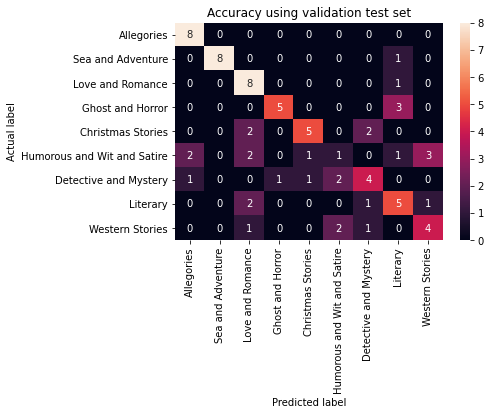

In [18]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_val, y_pred_lr)
sns.heatmap(cm, annot=True , xticklabels=train_data.genre.unique(), yticklabels=train_data.genre.unique())
plt.title('Accuracy using validation test set'.format(accuracy_score(y_val, y_pred_lr)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [19]:
print(classification_report(y_val, y_pred_lr))

                             precision    recall  f1-score   support

                 Allegories       0.73      1.00      0.84         8
          Christmas Stories       1.00      0.89      0.94         9
      Detective and Mystery       0.53      0.89      0.67         9
           Ghost and Horror       0.83      0.62      0.71         8
Humorous and Wit and Satire       0.71      0.56      0.63         9
                   Literary       0.20      0.10      0.13        10
           Love and Romance       0.50      0.44      0.47         9
          Sea and Adventure       0.45      0.56      0.50         9
            Western Stories       0.50      0.50      0.50         8

                   accuracy                           0.61        79
                  macro avg       0.61      0.62      0.60        79
               weighted avg       0.60      0.61      0.59        79



**LR with weights**

In [0]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train_pca,y_train)
y_pred_lr = lr.predict(X_val_pca)

In [26]:
print("Accuracy on overall test set is:", metrics.accuracy_score(y_val,y_pred_lr))

Accuracy on overall test set is: 0.5949367088607594


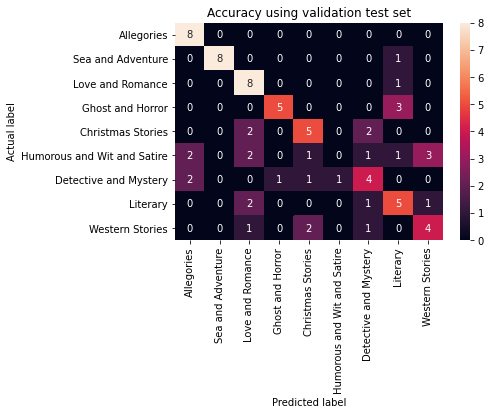

In [27]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_val, y_pred_lr)
sns.heatmap(cm, annot=True , xticklabels=train_data.genre.unique(), yticklabels=train_data.genre.unique())
plt.title('Accuracy using validation test set'.format(accuracy_score(y_val, y_pred_lr)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [28]:
print(classification_report(y_val, y_pred_lr))

                             precision    recall  f1-score   support

                 Allegories       0.67      1.00      0.80         8
          Christmas Stories       1.00      0.89      0.94         9
      Detective and Mystery       0.53      0.89      0.67         9
           Ghost and Horror       0.83      0.62      0.71         8
Humorous and Wit and Satire       0.56      0.56      0.56         9
                   Literary       0.00      0.00      0.00        10
           Love and Romance       0.44      0.44      0.44         9
          Sea and Adventure       0.45      0.56      0.50         9
            Western Stories       0.50      0.50      0.50         8

                   accuracy                           0.59        79
                  macro avg       0.55      0.61      0.57        79
               weighted avg       0.54      0.59      0.56        79



**SVM**

In [0]:
from sklearn.svm import SVC
lr = SVC()
lr.fit(X_train_pca,y_train)
y_pred_lr = lr.predict(X_val_pca)

In [21]:
print("Accuracy on overall test set is:", metrics.accuracy_score(y_val,y_pred_lr))

Accuracy on overall test set is: 0.5443037974683544


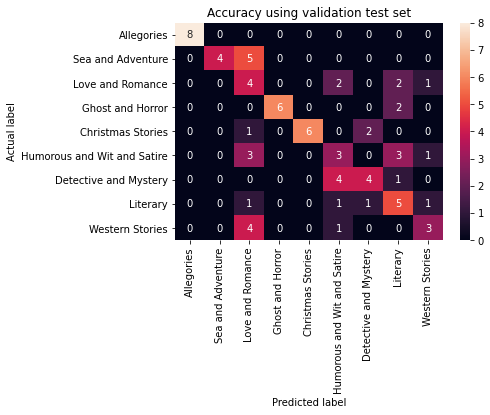

In [22]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_val, y_pred_lr)
sns.heatmap(cm, annot=True , xticklabels=train_data.genre.unique(), yticklabels=train_data.genre.unique())
plt.title('Accuracy using validation test set'.format(accuracy_score(y_val, y_pred_lr)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [23]:
print(classification_report(y_val, y_pred_lr))

                             precision    recall  f1-score   support

                 Allegories       1.00      1.00      1.00         8
          Christmas Stories       1.00      0.44      0.62         9
      Detective and Mystery       0.22      0.44      0.30         9
           Ghost and Horror       1.00      0.75      0.86         8
Humorous and Wit and Satire       1.00      0.67      0.80         9
                   Literary       0.27      0.30      0.29        10
           Love and Romance       0.57      0.44      0.50         9
          Sea and Adventure       0.38      0.56      0.45         9
            Western Stories       0.50      0.38      0.43         8

                   accuracy                           0.54        79
                  macro avg       0.66      0.55      0.58        79
               weighted avg       0.65      0.54      0.57        79



**Naive Bayes**

In [0]:
from sklearn.naive_bayes import MultinomialNB
lr = MultinomialNB()
lr.fit(X_train_pca,y_train)
y_pred_lr = lr.predict(X_val_pca)

In [0]:
print("Accuracy on overall test set is:", metrics.accuracy_score(y_val,y_pred_lr))

In [0]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_val, y_pred_lr)
sns.heatmap(cm, annot=True , xticklabels=train_data.genre.unique(), yticklabels=train_data.genre.unique())
plt.title('Accuracy using validation test set'.format(accuracy_score(y_val, y_pred_lr)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [0]:
print(classification_report(y_val, y_pred_lr))